<a href="https://colab.research.google.com/github/rawatpremsingh999/tensorflow-coursera/blob/master/coursera_1403.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Neural Network on real-world images

**Download the Image File:** This is a zip file containing images of humans and horses. 

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-07 05:46:12--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.13.240, 172.217.9.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  76.3MB/s    in 1.9s    

2021-01-07 05:46:14 (76.3 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



We use python OS library for using operating system libraries and also use zipfile library for unzipping file.

In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

**Note:** After executing above code, we see a horse-or-human directory in the tmp file. This file containing two sub-directories horses and humans. In this each subdirectory, containing respective computer generated .png images of different aspect ratios and sizes. 

**Here we did not label the data explicitly. It will automatically generate by ImageGenerator.**

Define each of sub-directories.

In [3]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

See how the horse and human images look like in the directory.

In [4]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse41-0.png', 'horse36-3.png', 'horse39-1.png', 'horse03-6.png', 'horse25-2.png', 'horse03-3.png', 'horse22-0.png', 'horse36-5.png', 'horse43-8.png', 'horse14-3.png']
['human13-00.png', 'human17-18.png', 'human08-15.png', 'human09-28.png', 'human13-14.png', 'human08-30.png', 'human06-15.png', 'human14-05.png', 'human15-02.png', 'human03-06.png']


Total Number of horse and human images

In [5]:
print('Total training horse images:', len(os.listdir(train_horse_dir)))
print('Total training human images:', len(os.listdir(train_human_dir)))

Total training horse images: 500
Total training human images: 527


See few images to get better sense of images that "how they look like?"

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display a batch of 8 horse and 8 human pictures. <br> 
We can rerun the cell to see a fresh batch of images each time:

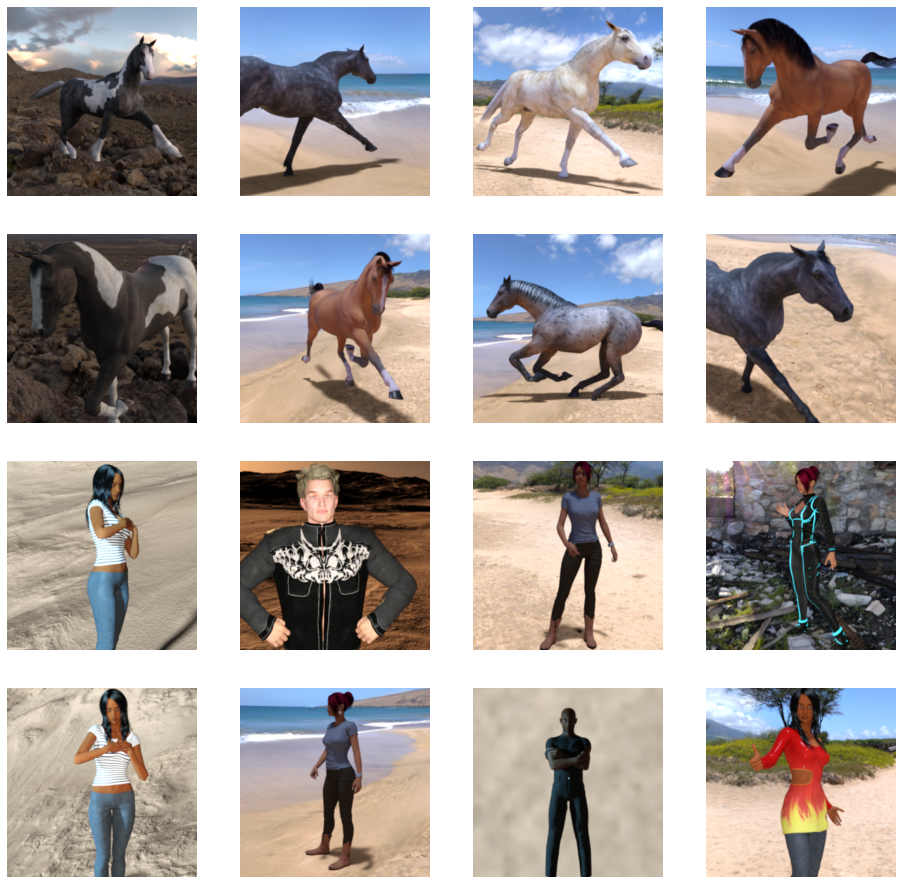

In [7]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Building a Network model from Scratch

In [8]:
import tensorflow as tf



*   First we add 2-D convolution layers 
*   then Flatten the result of convolution layers
*   Finally we add then densely connected layers
*   In the output layer, we use 1 unit with sigmoid activation because we have binary problem of classification.



In [9]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Summary of the Complete Network

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the dimensions.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. (For a refresher on loss metrics, see the [Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course/descending-into-ml/video-lecture).) We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

**Data Preprocessing**

Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of images of size 300x300 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit`, `evaluate_generator`, and `predict_generator`.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Images rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


**Define Stopping Criteria**

In [14]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.95):
      print("\nAccuracy reached greater than 95% so stopping training!")
      self.model.stop_training = True

stop = mycallback()

**Training**

In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,callbacks=[stop])

Epoch 1/15
8/8 [==============================] - 9s 632ms/step - loss: 1.2114 - accuracy: 0.5003
Epoch 2/15
8/8 [==============================] - 6s 702ms/step - loss: 0.6574 - accuracy: 0.6646
Epoch 3/15
8/8 [==============================] - 7s 806ms/step - loss: 0.6161 - accuracy: 0.6646
Epoch 4/15
8/8 [==============================] - 7s 802ms/step - loss: 0.4464 - accuracy: 0.8349
Epoch 5/15
8/8 [==============================] - 6s 693ms/step - loss: 0.7034 - accuracy: 0.7107
Epoch 6/15
8/8 [==============================] - 6s 707ms/step - loss: 0.5277 - accuracy: 0.8146
Epoch 7/15
8/8 [==============================] - 6s 707ms/step - loss: 0.2278 - accuracy: 0.9282
Epoch 8/15
8/8 [==============================] - 6s 699ms/step - loss: 0.1412 - accuracy: 0.9628

Accuracy reached greater than 95% so stopping training!


**Test any real Image of human or horse**

Saving boy-portrait.jpg to boy-portrait.jpg
Saving girl-2.jpg to girl-2.jpg
Saving girl-back-rail.jpg to girl-back-rail.jpg
Saving horses.jpg to horses.jpg
Saving horse-woman.jpg to horse-woman.jpg
Saving person.jpg to person.jpg
Saving triplets-woman.jpg to triplets-woman.jpg
Saving girl-1.jpg to girl-1.jpg
Saving horse-white.jpg to horse-white.jpg

Image boy-portrait.jpg is: 


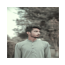


Image girl-2.jpg is: 


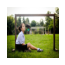


Image girl-back-rail.jpg is: 


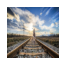


Image horses.jpg is: 


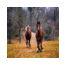


Image horse-woman.jpg is: 


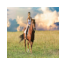


Image person.jpg is: 


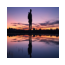


Image triplets-woman.jpg is: 


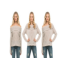


Image girl-1.jpg is: 


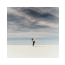


Image horse-white.jpg is: 


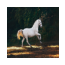

In [16]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt

uploaded = files.upload()
x = len(uploaded)

for i, image_name in enumerate(uploaded.keys()):
  path = '/content/'+image_name
  img = image.load_img(path,target_size=(300,300))

  # Set up subplot; subplot indices start at 1
  plt.figure(figsize=(10,10))
  sp = plt.subplot(x, 1, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  print("\nImage {} is: ".format(image_name))
  plt.imshow(img)
  plt.show()

In [18]:
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn

  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

[1.]
boy-portrait.jpg is a human
[0.]
girl-2.jpg is a horse
[1.]
girl-back-rail.jpg is a human
[1.]
horses.jpg is a human
[1.]
horse-woman.jpg is a human
[1.]
person.jpg is a human
[0.]
triplets-woman.jpg is a horse
[1.]
girl-1.jpg is a human
[1.]
horse-white.jpg is a human


**Visualizing Intermediate Representations**

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


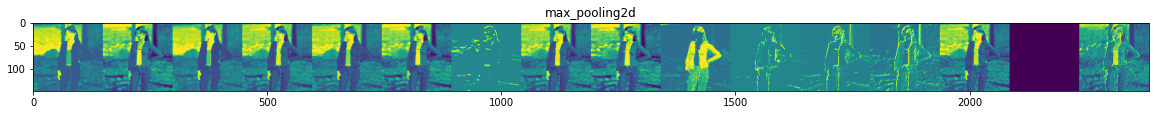

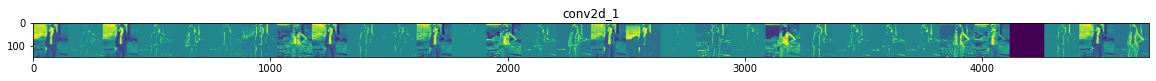

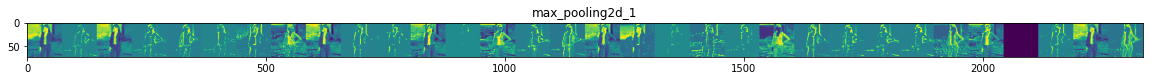

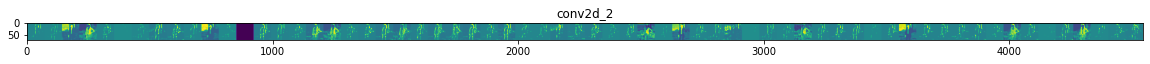

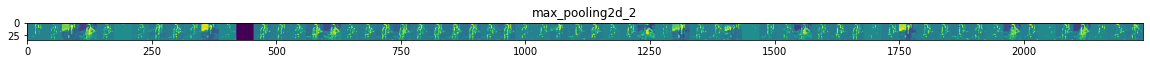

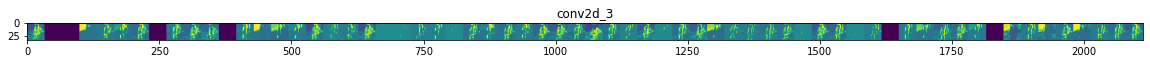

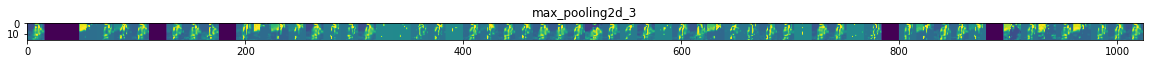

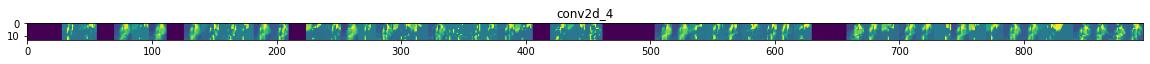

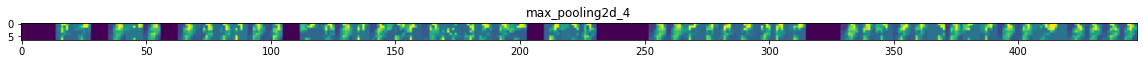

In [ ]:
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As we can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. We can think of a convnet (or a deep network in general) as an information distillation pipeline.

**Clean Up**

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import signal
os.kill(os.getpid(), signal.SIGKILL)

## Add validation data in training stage

Download zip files of training and validation data

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-01-07 05:50:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.31.128, 172.217.7.144, 172.217.13.80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   110MB/s    in 1.3s    

2021-01-07 05:50:20 (110 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-01-07 05:50:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.8.16, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  46.7MB/s    in 0.2s    

2021-01-07 05:50:20 (46.7 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



Import os and zipfile library

In [3]:
import os
import zipfile

local_zip = ('/tmp/horse-or-human.zip')
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/horse-or-human')

local_zip = ('/tmp/validation-horse-or-human.zip')
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

Define Sub-directories

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

Filenames in the directory

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(validation_horse_names[:10])

validation_human_names = os.listdir(validation_human_dir)
print(validation_human_names[:10])

['horse41-0.png', 'horse36-3.png', 'horse39-1.png', 'horse03-6.png', 'horse25-2.png', 'horse03-3.png', 'horse22-0.png', 'horse36-5.png', 'horse43-8.png', 'horse14-3.png']
['human13-00.png', 'human17-18.png', 'human08-15.png', 'human09-28.png', 'human13-14.png', 'human08-30.png', 'human06-15.png', 'human14-05.png', 'human15-02.png', 'human03-06.png']
['horse6-089.png', 'horse3-217.png', 'horse2-040.png', 'horse1-539.png', 'horse5-076.png', 'horse4-403.png', 'horse1-000.png', 'horse5-235.png', 'horse4-439.png', 'horse5-192.png']
['valhuman04-16.png', 'valhuman05-11.png', 'valhuman02-23.png', 'valhuman01-04.png', 'valhuman05-03.png', 'valhuman05-00.png', 'valhuman05-18.png', 'valhuman01-22.png', 'valhuman04-19.png', 'valhuman02-02.png']


Total number of horses and humans

In [7]:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))
print('total validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Look the pictures in validation set

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Display batches of 8 horses and 8 humans

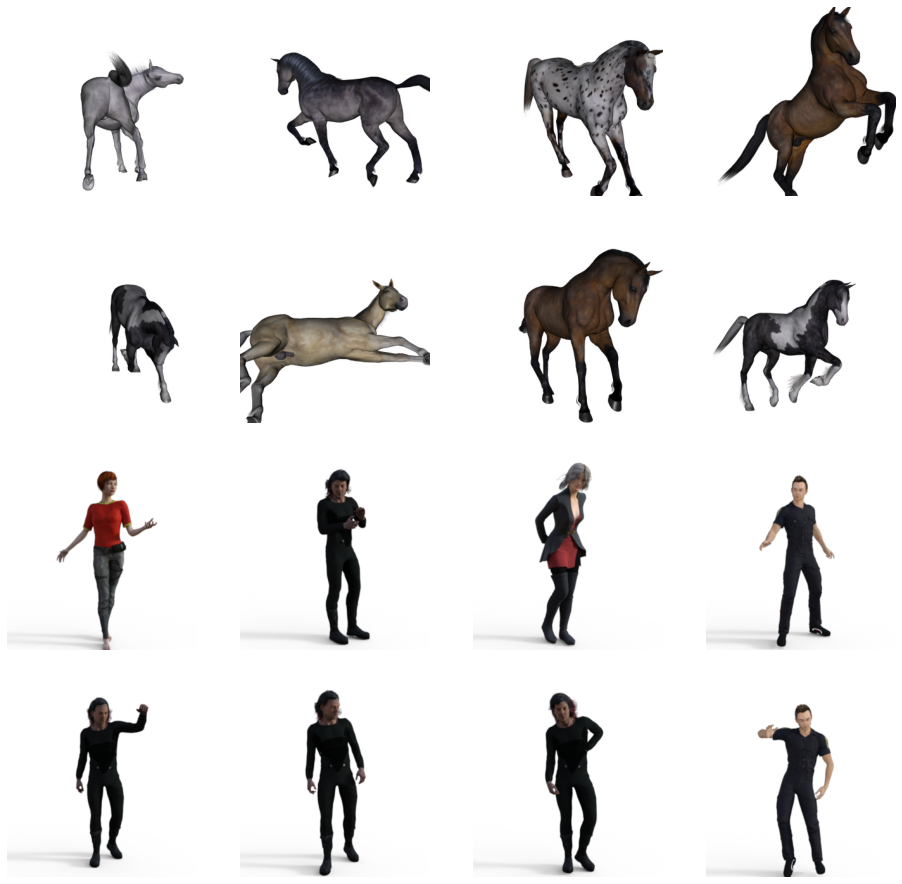

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(validation_horse_dir, fname) 
                for fname in validation_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(validation_human_dir, fname) 
                for fname in validation_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

### Build Convolution Neural Netwrok

In [10]:
import tensorflow as tf

In [11]:
# Stopping criteria
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>0.99):
      print("\nAccuracy reached greater than 99% so stopping training!")
      self.model.stop_training = True

stop = mycallback()

In [12]:
model1 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(300,300,3)),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Conv2D(32,3,activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Conv2D(64,3,activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Conv2D(32,3,activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Conv2D(16,3,activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(128,activation='relu'),
                              tf.keras.layers.Dense(1,activation='sigmoid')
                              ])

In [13]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 32)        1

In [14]:
from tensorflow.keras.optimizers import RMSprop

model1.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

Data Preprocessing using ImageGenerator

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


Training of the Network

In [16]:
history = model1.fit(train_generator,
                     epochs=20,
                     steps_per_epoch=8,
                     verbose=2,
                     validation_data=validation_generator,
                     validation_steps=8,callbacks=[stop])

Epoch 1/20
8/8 - 11s - loss: 0.8202 - accuracy: 0.5462 - val_loss: 0.6899 - val_accuracy: 0.5000
Epoch 2/20
8/8 - 7s - loss: 0.6819 - accuracy: 0.5373 - val_loss: 0.6499 - val_accuracy: 0.5117
Epoch 3/20
8/8 - 7s - loss: 0.5604 - accuracy: 0.7653 - val_loss: 0.5202 - val_accuracy: 0.9062
Epoch 4/20
8/8 - 7s - loss: 0.4419 - accuracy: 0.8154 - val_loss: 0.7795 - val_accuracy: 0.7500
Epoch 5/20
8/8 - 7s - loss: 0.2154 - accuracy: 0.9248 - val_loss: 0.5247 - val_accuracy: 0.8828
Epoch 6/20
8/8 - 7s - loss: 0.2025 - accuracy: 0.9143 - val_loss: 1.2697 - val_accuracy: 0.8086
Epoch 7/20
8/8 - 7s - loss: 0.1217 - accuracy: 0.9488 - val_loss: 1.6095 - val_accuracy: 0.7695
Epoch 8/20
8/8 - 7s - loss: 0.0657 - accuracy: 0.9744 - val_loss: 1.5400 - val_accuracy: 0.7969
Epoch 9/20
8/8 - 7s - loss: 0.0474 - accuracy: 0.9833 - val_loss: 3.3928 - val_accuracy: 0.5898
Epoch 10/20
8/8 - 7s - loss: 0.2008 - accuracy: 0.9288 - val_loss: 1.5363 - val_accuracy: 0.8047
Epoch 11/20
8/8 - 7s - loss: 0.0277 - 

Upload images and Test

In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model1.predict(images, batch_size=10)
  print(classes)
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving boy-portrait.jpg to boy-portrait.jpg
Saving girl-2.jpg to girl-2.jpg
Saving girl-back-rail.jpg to girl-back-rail.jpg
Saving horses.jpg to horses.jpg
Saving horse-woman.jpg to horse-woman.jpg
Saving person.jpg to person.jpg
Saving triplets-woman.jpg to triplets-woman.jpg
Saving girl-1.jpg to girl-1.jpg
Saving horse-white.jpg to horse-white.jpg
[[0.]]
boy-portrait.jpg is a horse
[[0.]]
girl-2.jpg is a horse
[[0.]]
girl-back-rail.jpg is a horse
[[0.]]
horses.jpg is a horse
[[1.]]
horse-woman.jpg is a human
[[1.]]
person.jpg is a human
[[0.]]
triplets-woman.jpg is a horse
[[1.]]
girl-1.jpg is a human
[[0.]]
horse-white.jpg is a horse


Compress images and reduce convolution layers

In [18]:
model2 = tf.keras.Sequential([
                              tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=(150,150,3)), # changed input shape
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Conv2D(64,3,activation='relu'),
                              tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(512,activation='relu'),
                              tf.keras.layers.Dense(1,activation='sigmoid')
                              ])

In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 82944)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               42467840  
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [20]:
model2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

Generate images of valid sizes for above network

In [21]:
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        '/tmp/validation-horse-or-human/',
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [22]:
history = model2.fit(train_generator,
                     epochs=20,
                     steps_per_epoch=8,
                     verbose=1,
                     validation_data=validation_generator,
                     validation_steps=8,callbacks=[stop])

Epoch 1/20
8/8 [==============================] - 7s 873ms/step - loss: 11.2766 - accuracy: 0.4786 - val_loss: 1.5038 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 6s 747ms/step - loss: 0.4760 - accuracy: 0.7595 - val_loss: 2.5536 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 6s 752ms/step - loss: 0.4526 - accuracy: 0.7958 - val_loss: 1.1277 - val_accuracy: 0.7266
Epoch 4/20
8/8 [==============================] - 6s 743ms/step - loss: 0.0825 - accuracy: 0.9761 - val_loss: 0.9822 - val_accuracy: 0.7812
Epoch 5/20
8/8 [==============================] - 6s 733ms/step - loss: 0.0365 - accuracy: 0.9876 - val_loss: 1.8205 - val_accuracy: 0.6953
Epoch 6/20
8/8 [==============================] - 6s 772ms/step - loss: 0.0186 - accuracy: 0.9954 - val_loss: 1.5685 - val_accuracy: 0.7539

Accuracy reached greater than 99% so stopping training!


Test the model

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model2.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving boy-portrait.jpg to boy-portrait.jpg
Saving girl-2.jpg to girl-2.jpg
Saving girl-back-rail.jpg to girl-back-rail.jpg
Saving horses.jpg to horses.jpg
Saving horse-woman.jpg to horse-woman.jpg
Saving person.jpg to person.jpg
Saving triplets-woman.jpg to triplets-woman.jpg
Saving girl-1.jpg to girl-1.jpg
Saving horse-white.jpg to horse-white.jpg
[1.]
boy-portrait.jpg is a human
[0.]
girl-2.jpg is a horse
[0.]
girl-back-rail.jpg is a horse
[0.]
horses.jpg is a horse
[1.]
horse-woman.jpg is a human
[1.]
person.jpg is a human
[0.]
triplets-woman.jpg is a horse
[1.]
girl-1.jpg is a human
[0.]
horse-white.jpg is a horse
